<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/vipsa_lr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [137]:
df = pd.read_csv("vipsa-db-lr4.csv", sep=';', decimal=',')
df

,v0210,v0211,v0212
0,26.622498,-61.231745,3.984588
1,24.200190,-55.660438,4.197974
2,25.661967,-59.022523,4.051241
3,19.772188,-45.476033,1.813623
4,22.952409,-52.790541,2.151280
...,...,...,...
95,24.046913,-55.307900,3.494095
96,26.921276,-61.918934,3.459304
97,26.830758,-61.710744,4.101779
98,22.587365,-51.950940,4.542222


In [138]:
x = df["v0210"].values
y1 = df["v0211"].values
y2 = df["v0212"].values
zxc = df[['v0210', 'v0212']]
zxc

,v0210,v0212
0,26.622498,3.984588
1,24.200190,4.197974
2,25.661967,4.051241
3,19.772188,1.813623
4,22.952409,2.151280
...,...,...
95,24.046913,3.494095
96,26.921276,3.459304
97,26.830758,4.101779
98,22.587365,4.542222


b1_y1 = -2.3000000000773726
b0_y1 = -2.469136006766348e-11
s2_y1 = 5.1045702738374656e-17
s_y1 = 7.144627543712454e-09

Интервальные оценки 0.95):
b0: (2.5125879166278395e-10; -3.006415117981109e-10)
b1: (-2.3000000000666536; -2.3000000000880916)

Оценка значимости модели:
F_y1 = 1.8196952597869045e+20
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (5.0935943725374954e-17; 5.185938897052065e-17)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y1 = -1.0
коэф. детерминации r2_y1 = 1.0


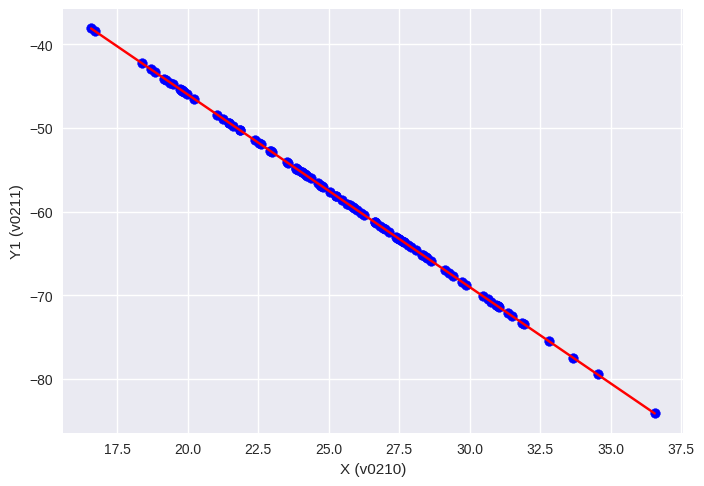

In [139]:
#зависимость У1 (в0211) от Х (в0210)
q2_xy1 = np.sum((x - np.mean(x)) * (y1 - np.mean(y1)))
q2_x = np.sum((x - np.mean(x))**2)
q2_y1 = np.sum((y1 - np.mean(y1))**2)
q2_y2 = np.sum((y2 - np.mean(y2))**2)

b1_y1 = q2_xy1 / q2_x
b0_y1 = np.mean(y1) - b1_y1 * np.mean(x)

q2_l_y1 = np.sum((y1 - (b0_y1 + b1_y1 * x))**2)
s2_y1 = q2_l_y1 / (len(x)-2)
s_y1 = np.sqrt(s2_y1)

print(f"b1_y1 = {b1_y1}")
print(f"b0_y1 = {b0_y1}")
print(f"s2_y1 = {s2_y1}")
print(f"s_y1 = {s_y1}")

n = len(x)
a = 0.05
t_crit = stats.t.ppf((1-a)/2, n-2)  # t_{(1-a)/2}

se_b0 = ((s_y1 / np.sum(x - np.mean(x))) * np.sqrt(np.sum(x**2)/n))
se_b1 = s_y1 / np.sqrt(q2_x)

print(f"\nИнтервальные оценки {1-a}):")
print(f"b0: ({b0_y1 - t_crit * np.sqrt(s2_y1)/np.sqrt(q2_x)*np.sqrt(np.sum(x**2)/n)}; {b0_y1 + t_crit * np.sqrt(s2_y1)/np.sqrt(q2_x)*np.sqrt(np.sum(x**2)/n)})")
print(f"b1: ({b1_y1 - t_crit * se_b1}; {b1_y1 + t_crit * se_b1})")

print("\nОценка значимости модели:")
q2_r_y1 = np.sum((b0_y1 + b1_y1 * x - np.mean(y1))**2)
F_y1 = q2_r_y1 / (q2_l_y1 /(n-2))
print(f"F_y1 = {F_y1}")
F_crit = stats.f.ppf(1-a, 1, n-2)
print(f"F_crit = {F_crit}")

# для оценнки дисперсии надо
chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower = (n-2) * s2_y1 / chi2_lower
sigma2_upper = (n-2) * s2_y1 / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({((n-2) * s2_y1)/(stats.chi2.ppf((1+a)/2, n-2))}; {((n-2) * s2_y1)/(stats.chi2.ppf((1-a)/2, n-2))})")

#тут щас оценка корреляции и детерминации будет
print(f"\nОценка коэф. корреляции и детерминации:")
r_y1 = q2_xy1 / np.sqrt(q2_x * q2_y1)
r2_y1 = r_y1**2
print(f"коэф. корреляции r_y1 = {r_y1}")
print(f"коэф. детерминации r2_y1 = {r2_y1}")

#туту щас будет проверка адекватности
plt.scatter(x, y1, alpha=1, color='blue')

x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = b0_y1 + b1_y1 * x_line
plt.plot(x_line, y_line, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y1 (v0211)')
plt.show()

b1_y1_power = nan
a_power = nan
s2_y1_power = nan
s_y1_power = nan

Интервальные оценки 0.95:
b1: (nan; nan)

Оценка значимости модели:
F_y1_power = nan
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (nan; nan)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y1_power = nan
коэф. детерминации r2_y1_power = nan


/tmp/ipython-input-2127661501.py:3: RuntimeWarning: invalid value encountered in log
  log_y1 = np.log(y1)


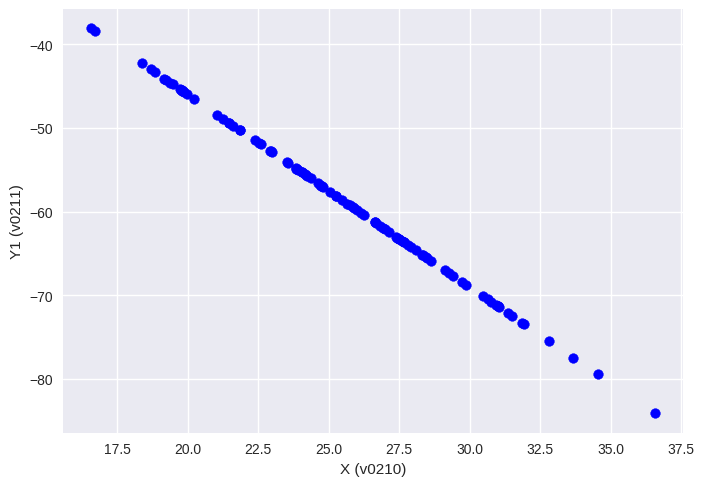

In [140]:
# СТЕПЕННАЯ для Y1 от X
log_x = np.log(x)
log_y1 = np.log(y1)

q2_xy1_power = np.sum((log_x - np.mean(log_x)) * (log_y1 - np.mean(log_y1)))
q2_x_power = np.sum((log_x - np.mean(log_x))**2)
q2_y1_power = np.sum((log_y1 - np.mean(log_y1))**2)

b1_y1_power = q2_xy1_power / q2_x_power
b0_y1_power = np.mean(log_y1) - b1_y1_power * np.mean(log_x)
a_power = np.exp(b0_y1_power)

q2_l_y1_power = np.sum((log_y1 - (b0_y1_power + b1_y1_power * log_x))**2)
s2_y1_power = q2_l_y1_power / (len(x)-2)
s_y1_power = np.sqrt(s2_y1_power)

print(f"b1_y1_power = {b1_y1_power}")
print(f"a_power = {a_power}")
print(f"s2_y1_power = {s2_y1_power}")
print(f"s_y1_power = {s_y1_power}")

se_b1_power = s_y1_power / np.sqrt(q2_x_power)

print(f"\nИнтервальные оценки {1-a}:")
print(f"b1: ({b1_y1_power - t_crit * se_b1_power}; {b1_y1_power + t_crit * se_b1_power})")

print("\nОценка значимости модели:")
q2_r_y1_power = np.sum((b0_y1_power + b1_y1_power * log_x - np.mean(log_y1))**2)
F_y1_power = q2_r_y1_power / (q2_l_y1_power / (n-2))
print(f"F_y1_power = {F_y1_power}")
print(f"F_crit = {F_crit}")

chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower_power = (n-2) * s2_y1_power / chi2_lower
sigma2_upper_power = (n-2) * s2_y1_power / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({sigma2_lower_power}; {sigma2_upper_power})")

print(f"\nОценка коэф. корреляции и детерминации:")
r_y1_power = q2_xy1_power / np.sqrt(q2_x_power * q2_y1_power)
r2_y1_power = r_y1_power**2
print(f"коэф. корреляции r_y1_power = {r_y1_power}")
print(f"коэф. детерминации r2_y1_power = {r2_y1_power}")

plt.scatter(x, y1, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_power = a_power * x_line**b1_y1_power
plt.plot(x_line, y_line_power, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y1 (v0211)')
plt.show()

/tmp/ipython-input-4078811546.py:2: RuntimeWarning: invalid value encountered in log
  log_y1 = np.log(y1)


b1_y1_exp = nan
a_exp = nan
s2_y1_exp = nan
s_y1_exp = nan

Интервальные оценки 0.95:
b1: (nan; nan)

Оценка значимости модели:
F_y1_exp = nan
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (nan; nan)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y1_exp = nan
коэф. детерминации r2_y1_exp = nan


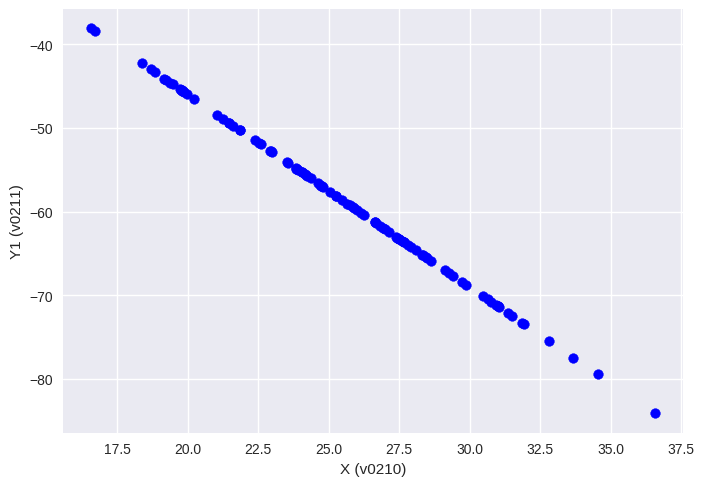

In [141]:
# ЭКСПОНЕНЦИАЛЬНАЯ РЕГРЕССИЯ для Y1 от X
log_y1 = np.log(y1)

q2_xy1_exp = np.sum((x - np.mean(x)) * (log_y1 - np.mean(log_y1)))
q2_x_exp = np.sum((x - np.mean(x))**2)
q2_y1_exp = np.sum((log_y1 - np.mean(log_y1))**2)

b1_y1_exp = q2_xy1_exp / q2_x_exp
b0_y1_exp = np.mean(log_y1) - b1_y1_exp * np.mean(x)
a_exp = np.exp(b0_y1_exp)

q2_l_y1_exp = np.sum((log_y1 - (b0_y1_exp + b1_y1_exp * x))**2)
s2_y1_exp = q2_l_y1_exp / (len(x)-2)
s_y1_exp = np.sqrt(s2_y1_exp)

print(f"b1_y1_exp = {b1_y1_exp}")
print(f"a_exp = {a_exp}")
print(f"s2_y1_exp = {s2_y1_exp}")
print(f"s_y1_exp = {s_y1_exp}")

se_b1_exp = s_y1_exp / np.sqrt(q2_x_exp)

print(f"\nИнтервальные оценки {1-a}:")
print(f"b1: ({b1_y1_exp - t_crit * se_b1_exp}; {b1_y1_exp + t_crit * se_b1_exp})")

print("\nОценка значимости модели:")
q2_r_y1_exp = np.sum((b0_y1_exp + b1_y1_exp * x - np.mean(log_y1))**2)
F_y1_exp = q2_r_y1_exp / (q2_l_y1_exp / (n-2))
print(f"F_y1_exp = {F_y1_exp}")
print(f"F_crit = {F_crit}")

chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower_exp = (n-2) * s2_y1_exp / chi2_lower
sigma2_upper_exp = (n-2) * s2_y1_exp / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({sigma2_lower_exp}; {sigma2_upper_exp})")

print(f"\nОценка коэф. корреляции и детерминации:")
r_y1_exp = q2_xy1_exp / np.sqrt(q2_x_exp * q2_y1_exp)
r2_y1_exp = r_y1_exp**2
print(f"коэф. корреляции r_y1_exp = {r_y1_exp}")
print(f"коэф. детерминации r2_y1_exp = {r2_y1_exp}")

plt.scatter(x, y1, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_exp = a_exp * np.exp(b1_y1_exp * x_line)
plt.plot(x_line, y_line_exp, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y1 (v0211)')
plt.show()

b1_y1_inv = 1352.524349541087
b0_y1_inv = -113.19598838670251
s2_y1_inv = 3.76097225634114
s_y1_inv = 1.9393226282238702

Интервальные оценки 0.95:
b1: (1354.2703120447393; 1350.7783870374349)

Оценка значимости модели:
F_y1_inv = 2371.776881467279
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (2.895736015883264; 5.083731103006415)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y1_inv = 0.9799593370734515
коэф. детерминации r2_y1_inv = 0.9603203023174386


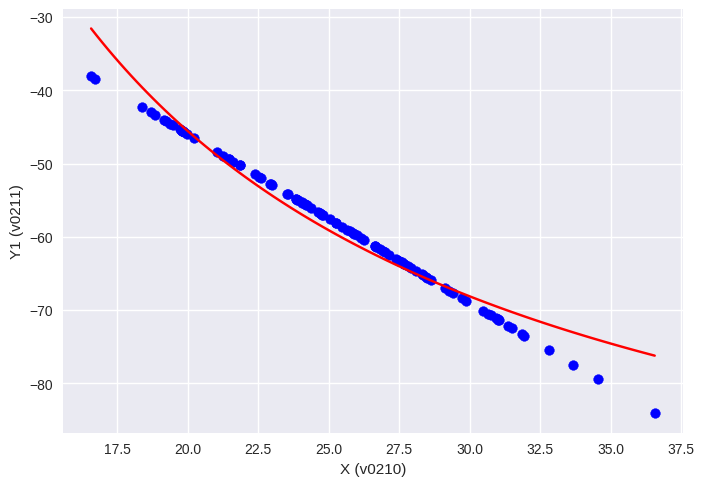

In [142]:
# ОБРАТНО ПРОПОРЦИОНАЛЬНАЯ РЕГРЕССИЯ для Y1 от X
inv_x = 1/x

q2_xy1_inv = np.sum((inv_x - np.mean(inv_x)) * (y1 - np.mean(y1)))
q2_x_inv = np.sum((inv_x - np.mean(inv_x))**2)
q2_y1_inv = np.sum((y1 - np.mean(y1))**2)

b1_y1_inv = q2_xy1_inv / q2_x_inv
b0_y1_inv = np.mean(y1) - b1_y1_inv * np.mean(inv_x)

q2_l_y1_inv = np.sum((y1 - (b0_y1_inv + b1_y1_inv * inv_x))**2)
s2_y1_inv = q2_l_y1_inv / (len(x)-2)
s_y1_inv = np.sqrt(s2_y1_inv)

print(f"b1_y1_inv = {b1_y1_inv}")
print(f"b0_y1_inv = {b0_y1_inv}")
print(f"s2_y1_inv = {s2_y1_inv}")
print(f"s_y1_inv = {s_y1_inv}")

se_b1_inv = s_y1_inv / np.sqrt(q2_x_inv)

print(f"\nИнтервальные оценки {1-a}:")
print(f"b1: ({b1_y1_inv - t_crit * se_b1_inv}; {b1_y1_inv + t_crit * se_b1_inv})")

print("\nОценка значимости модели:")
q2_r_y1_inv = np.sum((b0_y1_inv + b1_y1_inv * inv_x - np.mean(y1))**2)
F_y1_inv = q2_r_y1_inv / (q2_l_y1_inv / (n-2))
print(f"F_y1_inv = {F_y1_inv}")
print(f"F_crit = {F_crit}")

chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower_inv = (n-2) * s2_y1_inv / chi2_lower
sigma2_upper_inv = (n-2) * s2_y1_inv / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({sigma2_lower_inv}; {sigma2_upper_inv})")

print(f"\nОценка коэф. корреляции и детерминации:")
r_y1_inv = q2_xy1_inv / np.sqrt(q2_x_inv * q2_y1_inv)
r2_y1_inv = r_y1_inv**2
print(f"коэф. корреляции r_y1_inv = {r_y1_inv}")
print(f"коэф. детерминации r2_y1_inv = {r2_y1_inv}")

plt.scatter(x, y1, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_inv = b0_y1_inv + b1_y1_inv / x_line
plt.plot(x_line, y_line_inv, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y1 (v0211)')
plt.show()

b1_y2 = -0.021698249828566787
b0_y2 = 1.5628650947428602
s2_y2 = 0.17898791229656144
s_y2 = 0.4230696305533658

Интервальные оценки 0.95):
b0: (1.5465246867888462; 1.579205502696874)
b1: (-0.02233297759585115; -0.021063522061282425)

Оценка значимости модели:
F_y2 = 4.618786489571336
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (0.1786030505836522; 0.1818410417892186)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y2 = -0.21215364906462345
коэф. детерминации r2_y2 = 0.0450091708114354


/tmp/ipython-input-814588844.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


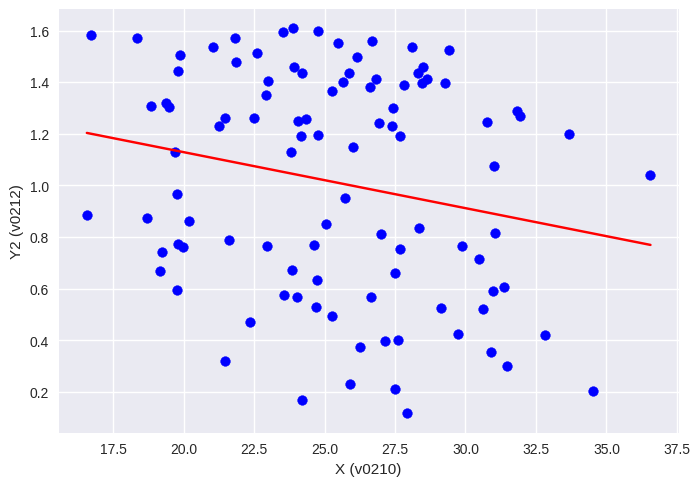

In [ ]:
#зависимость У2 (в0212) от Х (в0210)
q2_xy2 = np.sum((x - np.mean(x)) * (y2 - np.mean(y2)))
q2_x = np.sum((x - np.mean(x))**2)
q2_y1 = np.sum((y1 - np.mean(y1))**2)
q2_y2 = np.sum((y2 - np.mean(y2))**2)

b1_y2 = q2_xy2 / q2_x
b0_y2 = np.mean(y2) - b1_y2 * np.mean(x)

q2_l_y2 = np.sum((y2 - (b0_y2 + b1_y2 * x))**2)
s2_y2 = q2_l_y2 / (len(x)-2)
s_y2 = np.sqrt(s2_y2)

print(f"b1_y2 = {b1_y2}")
print(f"b0_y2 = {b0_y2}")
print(f"s2_y2 = {s2_y2}")
print(f"s_y2 = {s_y2}")

n = len(x)
a = 0.05
t_crit = stats.t.ppf((1 + a)/2, n-2)  # t_{(1 - a) / 2}

se_b0 = ((s_y2 / np.sum(x - np.mean(x))) * np.sqrt(np.sum(x**2)/n))
se_b1 = s_y2 / np.sqrt(q2_x)

print(f"\nИнтервальные оценки {1-a}):")
print(f"b0: ({b0_y2 - t_crit * np.sqrt(s2_y2)/np.sqrt(q2_x)*np.sqrt(np.sum(x**2)/n)}; {b0_y2 + t_crit * np.sqrt(s2_y2)/np.sqrt(q2_x)*np.sqrt(np.sum(x**2)/n)})")
print(f"b1: ({b1_y2 - t_crit * se_b1}; {b1_y2 + t_crit * se_b1})")

print("\nОценка значимости модели:")
q2_r_y2 = np.sum((b0_y2 + b1_y2 * x - np.mean(y2))**2)
F_y2 = q2_r_y2 / (q2_l_y2 /(n-2))
print(f"F_y2 = {F_y2}")
F_crit = stats.f.ppf(1-a, 1, n-2)
print(f"F_crit = {F_crit}")

# для оценнки дисперсии надо
chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower = (n-2) * s2_y2 / chi2_lower
sigma2_upper = (n-2) * s2_y2 / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({((n-2) * s2_y2)/(stats.chi2.ppf((1+a)/2, n-2))}; {((n-2) * s2_y2)/(stats.chi2.ppf((1-a)/2, n-2))})")

#тут щас оценка корреляции и детерминации будет
print(f"\nОценка коэф. корреляции и детерминации:")
r_y2 = q2_xy2 / np.sqrt(q2_x * q2_y2)
r2_y2 = r_y2**2
print(f"коэф. корреляции r_y2 = {r_y2}")
print(f"коэф. детерминации r2_y2 = {r2_y2}")

#туту щас будет проверка адекватности
plt.scatter(x, y2, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = b0_y2 + b1_y2 * x_line
plt.plot(x_line, y_line, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y2 (v0212)')
plt.legend()
plt.show()

b1_y2_power = -0.7627838666556434
a_power = 10.361267154145946
s2_y2_power = 0.318370750945366
s_y2_power = 0.5642435209600248

Интервальные оценки 0.95:
b1: (-0.7838685240281215; -0.7416992092831652)

Оценка значимости модели:
F_y2_power = 5.172772438530555
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (0.24512747956646297; 0.43034385221523386)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y2_power = -0.22391291103949762
коэф. детерминации r2_y2_power = 0.050136991730181976


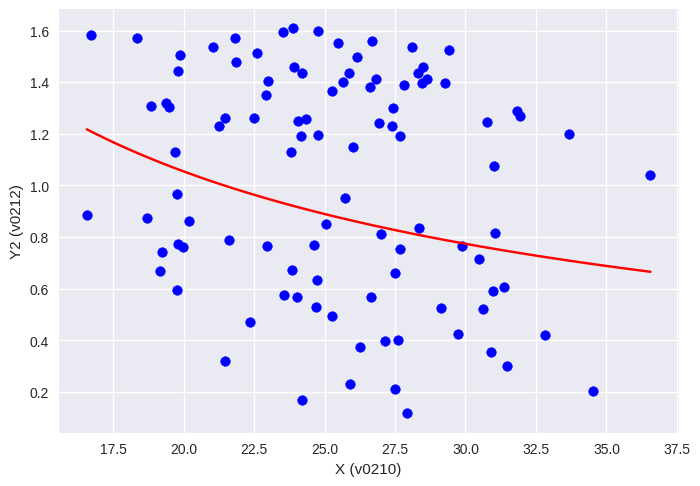

In [ ]:
# СТЕПЕННАЯ РЕГРЕССИЯ для Y2 от X
log_x = np.log(x)
log_y2 = np.log(y2)

q2_xy2_power = np.sum((log_x - np.mean(log_x)) * (log_y2 - np.mean(log_y2)))
q2_x_power = np.sum((log_x - np.mean(log_x))**2)
q2_y2_power = np.sum((log_y2 - np.mean(log_y2))**2)

b1_y2_power = q2_xy2_power / q2_x_power
b0_y2_power = np.mean(log_y2) - b1_y2_power * np.mean(log_x)
a_power = np.exp(b0_y2_power)

q2_l_y2_power = np.sum((log_y2 - (b0_y2_power + b1_y2_power * log_x))**2)
s2_y2_power = q2_l_y2_power / (len(x)-2)
s_y2_power = np.sqrt(s2_y2_power)

print(f"b1_y2_power = {b1_y2_power}")
print(f"a_power = {a_power}")
print(f"s2_y2_power = {s2_y2_power}")
print(f"s_y2_power = {s_y2_power}")

se_b1_power = s_y2_power / np.sqrt(q2_x_power)

print(f"\nИнтервальные оценки {1-a}:")
print(f"b1: ({b1_y2_power - t_crit * se_b1_power}; {b1_y2_power + t_crit * se_b1_power})")

print("\nОценка значимости модели:")
q2_r_y2_power = np.sum((b0_y2_power + b1_y2_power * log_x - np.mean(log_y2))**2)
F_y2_power = q2_r_y2_power / (q2_l_y2_power / (n-2))
print(f"F_y2_power = {F_y2_power}")
print(f"F_crit = {F_crit}")

chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower_power = (n-2) * s2_y2_power / chi2_lower
sigma2_upper_power = (n-2) * s2_y2_power / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({sigma2_lower_power}; {sigma2_upper_power})")

print(f"\nОценка коэф. корреляции и детерминации:")
r_y2_power = q2_xy2_power / np.sqrt(q2_x_power * q2_y2_power)
r2_y2_power = r_y2_power**2
print(f"коэф. корреляции r_y2_power = {r_y2_power}")
print(f"коэф. детерминации r2_y2_power = {r2_y2_power}")

plt.scatter(x, y2, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_power = a_power * x_line**b1_y2_power
plt.plot(x_line, y_line_power, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y2 (v0212)')
plt.show()

b1_y2_exp = -0.0311822324249746
a_exp = 1.9607213452024725
s2_y2_exp = 0.3177537399370548
s_y2_exp = 0.5636964962965929

Интервальные оценки 0.95:
b1: (-0.03202794148249397; -0.03033652336745523)

Оценка значимости модели:
F_y2_exp = 5.373112287764644
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (0.24465241597194945; 0.4295098343496247)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y2_exp = -0.2279865162221556
коэф. детерминации r2_y2_exp = 0.05197785157911522


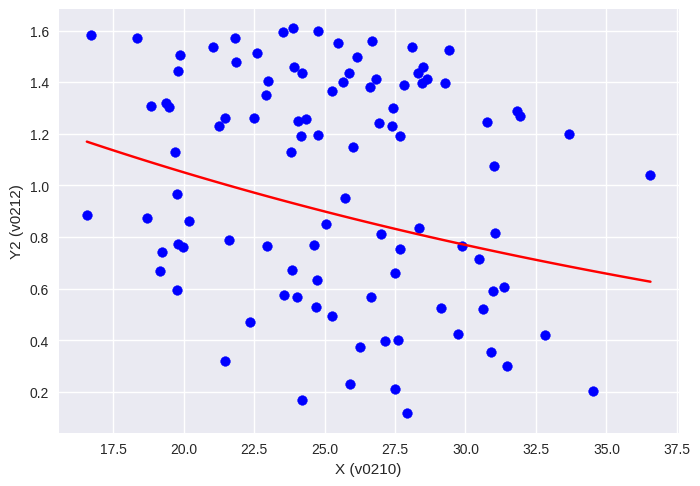

In [ ]:
# ЭКСПОНЕНЦИАЛЬНАЯ РЕГРЕССИЯ для Y2 от X
log_y2 = np.log(y2)

q2_xy2_exp = np.sum((x - np.mean(x)) * (log_y2 - np.mean(log_y2)))
q2_x_exp = np.sum((x - np.mean(x))**2)
q2_y2_exp = np.sum((log_y2 - np.mean(log_y2))**2)

b1_y2_exp = q2_xy2_exp / q2_x_exp
b0_y2_exp = np.mean(log_y2) - b1_y2_exp * np.mean(x)
a_exp = np.exp(b0_y2_exp)

q2_l_y2_exp = np.sum((log_y2 - (b0_y2_exp + b1_y2_exp * x))**2)
s2_y2_exp = q2_l_y2_exp / (len(x)-2)
s_y2_exp = np.sqrt(s2_y2_exp)

print(f"b1_y2_exp = {b1_y2_exp}")
print(f"a_exp = {a_exp}")
print(f"s2_y2_exp = {s2_y2_exp}")
print(f"s_y2_exp = {s_y2_exp}")

se_b1_exp = s_y2_exp / np.sqrt(q2_x_exp)

print(f"\nИнтервальные оценки {1-a}:")
print(f"b1: ({b1_y2_exp - t_crit * se_b1_exp}; {b1_y2_exp + t_crit * se_b1_exp})")

print("\nОценка значимости модели:")
q2_r_y2_exp = np.sum((b0_y2_exp + b1_y2_exp * x - np.mean(log_y2))**2)
F_y2_exp = q2_r_y2_exp / (q2_l_y2_exp / (n-2))
print(f"F_y2_exp = {F_y2_exp}")
print(f"F_crit = {F_crit}")

chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower_exp = (n-2) * s2_y2_exp / chi2_lower
sigma2_upper_exp = (n-2) * s2_y2_exp / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({sigma2_lower_exp}; {sigma2_upper_exp})")

print(f"\nОценка коэф. корреляции и детерминации:")
r_y2_exp = q2_xy2_exp / np.sqrt(q2_x_exp * q2_y2_exp)
r2_y2_exp = r_y2_exp**2
print(f"коэф. корреляции r_y2_exp = {r_y2_exp}")
print(f"коэф. детерминации r2_y2_exp = {r2_y2_exp}")

plt.scatter(x, y2, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_exp = a_exp * np.exp(b1_y2_exp * x_line)
plt.plot(x_line, y_line_exp, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y2 (v0212)')
plt.grid(True)
plt.show()

b1_y2_inv = 12.09031636664226
b0_y2_inv = 0.5220821614964811
s2_y2_inv = 0.18015037189135547
s_y2_inv = 0.42444124668952177

Интервальные оценки 0.95:
b1: (11.708194026120719; 12.4724387071638)

Оценка значимости модели:
F_y2_inv = 3.9566163718606595
F_crit = 3.938111078003373

оценка дисперсии
sigma^2: (0.13870560179778257; 0.24351045059109983)

Оценка коэф. корреляции и детерминации:
коэф. корреляции r_y2_inv = 0.19699457428439116
коэф. детерминации r2_y2_inv = 0.038806862297488504


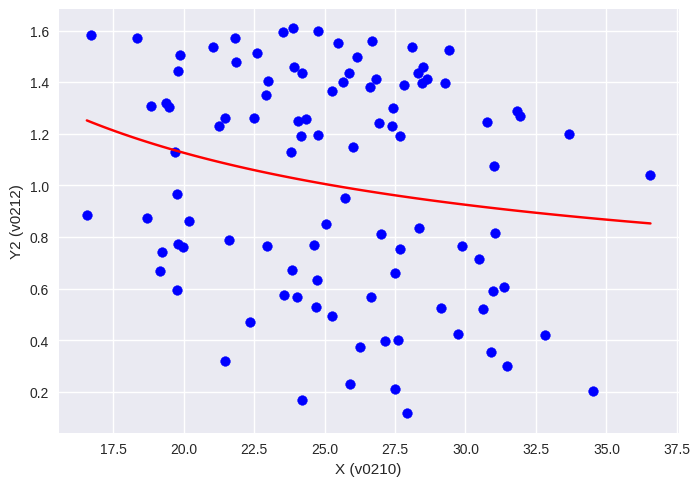

In [ ]:
# ОБРАТНО ПРОПОРЦИОНАЛЬНАЯ РЕГРЕССИЯ для Y2 от X
inv_x = 1/x

q2_xy2_inv = np.sum((inv_x - np.mean(inv_x)) * (y2 - np.mean(y2)))
q2_x_inv = np.sum((inv_x - np.mean(inv_x))**2)
q2_y2_inv = np.sum((y2 - np.mean(y2))**2)

b1_y2_inv = q2_xy2_inv / q2_x_inv
b0_y2_inv = np.mean(y2) - b1_y2_inv * np.mean(inv_x)

q2_l_y2_inv = np.sum((y2 - (b0_y2_inv + b1_y2_inv * inv_x))**2)
s2_y2_inv = q2_l_y2_inv / (len(x)-2)
s_y2_inv = np.sqrt(s2_y2_inv)

print(f"b1_y2_inv = {b1_y2_inv}")
print(f"b0_y2_inv = {b0_y2_inv}")
print(f"s2_y2_inv = {s2_y2_inv}")
print(f"s_y2_inv = {s_y2_inv}")

se_b1_inv = s_y2_inv / np.sqrt(q2_x_inv)

print(f"\nИнтервальные оценки {1-a}:")
print(f"b1: ({b1_y2_inv - t_crit * se_b1_inv}; {b1_y2_inv + t_crit * se_b1_inv})")

print("\nОценка значимости модели:")
q2_r_y2_inv = np.sum((b0_y2_inv + b1_y2_inv * inv_x - np.mean(y2))**2)
F_y2_inv = q2_r_y2_inv / (q2_l_y2_inv / (n-2))
print(f"F_y2_inv = {F_y2_inv}")
print(f"F_crit = {F_crit}")

chi2_lower = stats.chi2.ppf(1 - a/2, n-2)
chi2_upper = stats.chi2.ppf(a/2, n-2)
sigma2_lower_inv = (n-2) * s2_y2_inv / chi2_lower
sigma2_upper_inv = (n-2) * s2_y2_inv / chi2_upper
print(f"\nоценка дисперсии")
print(f"sigma^2: ({sigma2_lower_inv}; {sigma2_upper_inv})")

print(f"\nОценка коэф. корреляции и детерминации:")
r_y2_inv = q2_xy2_inv / np.sqrt(q2_x_inv * q2_y2_inv)
r2_y2_inv = r_y2_inv**2
print(f"коэф. корреляции r_y2_inv = {r_y2_inv}")
print(f"коэф. детерминации r2_y2_inv = {r2_y2_inv}")

plt.scatter(x, y2, alpha=1, color='blue')
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_inv = b0_y2_inv + b1_y2_inv / x_line
plt.plot(x_line, y_line_inv, 'r-')
plt.xlabel('X (v0210)')
plt.ylabel('Y2 (v0212)')
plt.show()